In [11]:
import pandas as pd
import numpy as np
from varclushi import VarClusHi

In [12]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('JDT.csv')


In [13]:
df['class'].value_counts()

clean    791
buggy    206
Name: class, dtype: int64

In [14]:
df.drop('id', axis = 1, inplace = True)

In [15]:
df.drop('class', axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ck_oo_numberOfPrivateMethods         997 non-null    int64  
 1   LDHH_lcom                            997 non-null    float64
 2   LDHH_fanIn                           997 non-null    float64
 3   numberOfNonTrivialBugsFoundUntil:    997 non-null    int64  
 4   WCHU_numberOfPublicAttributes        997 non-null    float64
 5   WCHU_numberOfAttributes              997 non-null    float64
 6   CvsWEntropy                          997 non-null    float64
 7   LDHH_numberOfPublicMethods           997 non-null    float64
 8   WCHU_fanIn                           997 non-null    float64
 9   LDHH_numberOfPrivateAttributes       997 non-null    float64
 10  CvsEntropy                           997 non-null    float64
 11  LDHH_numberOfPublicAttributes   

In [17]:
# Calculate the Spearman correlation matrix
corr_matrix = df.corr(method='spearman')

In [18]:
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, ck_oo_numberOfPrivateMethods to LDHH_numberOfMethods
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ck_oo_numberOfPrivateMethods         61 non-null     float64
 1   LDHH_lcom                            61 non-null     float64
 2   LDHH_fanIn                           61 non-null     float64
 3   numberOfNonTrivialBugsFoundUntil:    61 non-null     float64
 4   WCHU_numberOfPublicAttributes        61 non-null     float64
 5   WCHU_numberOfAttributes              61 non-null     float64
 6   CvsWEntropy                          61 non-null     float64
 7   LDHH_numberOfPublicMethods           61 non-null     float64
 8   WCHU_fanIn                           61 non-null     float64
 9   LDHH_numberOfPrivateAttributes       61 non-null     float64
 10  CvsEntropy                           61 non-null     float64

In [19]:
print(corr_matrix)

                                   ck_oo_numberOfPrivateMethods  LDHH_lcom  \
ck_oo_numberOfPrivateMethods                           1.000000   0.359923   
LDHH_lcom                                              0.359923   1.000000   
LDHH_fanIn                                             0.160669   0.398442   
numberOfNonTrivialBugsFoundUntil:                      0.320184   0.533696   
WCHU_numberOfPublicAttributes                          0.216817   0.340025   
...                                                         ...        ...   
ck_oo_numberOfPublicMethods                            0.195772   0.439656   
LDHH_cbo                                               0.320419   0.562027   
WCHU_numberOfLinesOfCode                               0.429168   0.733778   
CvsExpEntropy                                          0.245253   0.487244   
LDHH_numberOfMethods                                   0.363831   0.998303   

                                   LDHH_fanIn  \
ck_oo_numberOf

In [20]:
# Perform hierarchical clustering using varclushi
vc = VarClusHi(df,maxeigval2=1,maxclus=None)
vc.varclus()

In [21]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,6,4.970845,0.485424,0.828474
1,1,5,3.956560,0.725218,0.791312
2,2,7,5.279177,0.693166,0.754168
3,3,6,3.860309,0.944139,0.643385
4,4,6,4.137572,0.989395,0.689595
5,5,3,2.886497,0.109734,0.962166
6,6,6,4.260047,0.772213,0.710008
7,7,5,3.122566,0.959159,0.624513
8,8,11,8.917614,0.818688,0.810692
9,9,2,1.409061,0.590939,0.704531


In [22]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,LDHH_fanIn,0.824992,0.192010,0.216597
1,0,WCHU_fanIn,0.895058,0.230876,0.136444
2,0,ck_oo_fanIn,0.779178,0.279980,0.306688
3,0,ck_oo_cbo,0.807973,0.498768,0.383109
4,0,WCHU_cbo,0.878577,0.552058,0.271069
...,...,...,...,...,...
56,9,WCHU_noc,0.704531,0.011981,0.299052
57,10,ck_oo_numberOfLinesOfCode,0.945752,0.559119,0.123045
58,10,ck_oo_rfc,0.873186,0.544774,0.278574
59,10,ck_oo_wmc,0.925237,0.561034,0.170316


In [23]:
clusters = vc.rsquare

In [24]:
print(clusters)

    Cluster                   Variable    RS_Own     RS_NC  RS_Ratio
0         0                 LDHH_fanIn  0.824992  0.192010  0.216597
1         0                 WCHU_fanIn  0.895058  0.230876  0.136444
2         0                ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                  ck_oo_cbo  0.807973  0.498768  0.383109
4         0                   WCHU_cbo  0.878577  0.552058  0.271069
..      ...                        ...       ...       ...       ...
56        9                   WCHU_noc  0.704531  0.011981  0.299052
57       10  ck_oo_numberOfLinesOfCode  0.945752  0.559119  0.123045
58       10                  ck_oo_rfc  0.873186  0.544774  0.278574
59       10                  ck_oo_wmc  0.925237  0.561034  0.170316
60       10                CvsWEntropy  0.708107  0.570679  0.679893

[61 rows x 5 columns]


In [25]:
print(clusters.Cluster)

0      0
1      0
2      0
3      0
4      0
      ..
56     9
57    10
58    10
59    10
60    10
Name: Cluster, Length: 61, dtype: int64


In [26]:
max(clusters.RS_Ratio)

1.1272290303944066

In [27]:
min(clusters.RS_Ratio)

0.006659418900299472

In [28]:
for i in clusters.Cluster:
 if(i == 10):
   print(clusters.RS_Ratio)
   

0     0.216597
1     0.136444
2     0.306688
3     0.383109
4     0.271069
        ...   
56    0.299052
57    0.123045
58    0.278574
59    0.170316
60    0.679893
Name: RS_Ratio, Length: 61, dtype: float64
0     0.216597
1     0.136444
2     0.306688
3     0.383109
4     0.271069
        ...   
56    0.299052
57    0.123045
58    0.278574
59    0.170316
60    0.679893
Name: RS_Ratio, Length: 61, dtype: float64
0     0.216597
1     0.136444
2     0.306688
3     0.383109
4     0.271069
        ...   
56    0.299052
57    0.123045
58    0.278574
59    0.170316
60    0.679893
Name: RS_Ratio, Length: 61, dtype: float64
0     0.216597
1     0.136444
2     0.306688
3     0.383109
4     0.271069
        ...   
56    0.299052
57    0.123045
58    0.278574
59    0.170316
60    0.679893
Name: RS_Ratio, Length: 61, dtype: float64


In [29]:
print(clusters)

    Cluster                   Variable    RS_Own     RS_NC  RS_Ratio
0         0                 LDHH_fanIn  0.824992  0.192010  0.216597
1         0                 WCHU_fanIn  0.895058  0.230876  0.136444
2         0                ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                  ck_oo_cbo  0.807973  0.498768  0.383109
4         0                   WCHU_cbo  0.878577  0.552058  0.271069
..      ...                        ...       ...       ...       ...
56        9                   WCHU_noc  0.704531  0.011981  0.299052
57       10  ck_oo_numberOfLinesOfCode  0.945752  0.559119  0.123045
58       10                  ck_oo_rfc  0.873186  0.544774  0.278574
59       10                  ck_oo_wmc  0.925237  0.561034  0.170316
60       10                CvsWEntropy  0.708107  0.570679  0.679893

[61 rows x 5 columns]


In [30]:
idx = clusters.groupby(['Cluster'])['RS_Ratio'].idxmax()
clusters = clusters.drop(idx)

In [31]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
0         0                           LDHH_fanIn  0.824992  0.192010  0.216597
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
12        2              numberOfBugsFoundUntil:  0.915809  0.676621  0.260347
13        2         numberOfMajorBugsFoundUntil:  0.

In [32]:
cluster0 = ["LDHH_fanIn", "WCHU_fanIn", "ck_oo_fanIn", "ck_oo_cbo"]

In [33]:
print(cluster0)

['LDHH_fanIn', 'WCHU_fanIn', 'ck_oo_fanIn', 'ck_oo_cbo']


In [34]:
from scipy.stats import spearmanr

In [35]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix0 = df[cluster0].corr(method='spearman')

In [36]:
corr_matrix0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, LDHH_fanIn to ck_oo_cbo
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LDHH_fanIn   4 non-null      float64
 1   WCHU_fanIn   4 non-null      float64
 2   ck_oo_fanIn  4 non-null      float64
 3   ck_oo_cbo    4 non-null      float64
dtypes: float64(4)
memory usage: 332.0+ bytes


In [37]:
print(corr_matrix0)

             LDHH_fanIn  WCHU_fanIn  ck_oo_fanIn  ck_oo_cbo
LDHH_fanIn     1.000000    0.977808     0.615483   0.420045
WCHU_fanIn     0.977808    1.000000     0.630505   0.432667
ck_oo_fanIn    0.615483    0.630505     1.000000   0.588459
ck_oo_cbo      0.420045    0.432667     0.588459   1.000000


In [38]:
print(abs(corr_matrix0))

             LDHH_fanIn  WCHU_fanIn  ck_oo_fanIn  ck_oo_cbo
LDHH_fanIn     1.000000    0.977808     0.615483   0.420045
WCHU_fanIn     0.977808    1.000000     0.630505   0.432667
ck_oo_fanIn    0.615483    0.630505     1.000000   0.588459
ck_oo_cbo      0.420045    0.432667     0.588459   1.000000


In [39]:
abs(corr_matrix0)

,LDHH_fanIn,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo
LDHH_fanIn,1.000000,0.977808,0.615483,0.420045
WCHU_fanIn,0.977808,1.000000,0.630505,0.432667
ck_oo_fanIn,0.615483,0.630505,1.000000,0.588459
ck_oo_cbo,0.420045,0.432667,0.588459,1.000000


In [40]:
cluster0.remove('LDHH_fanIn')

In [41]:
# Print the final set of attributes in the cluster
print(cluster0)

['WCHU_fanIn', 'ck_oo_fanIn', 'ck_oo_cbo']


In [42]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix0 = df[cluster0].corr(method='spearman')

In [43]:
abs(corr_matrix0)

,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo
WCHU_fanIn,1.000000,0.630505,0.432667
ck_oo_fanIn,0.630505,1.000000,0.588459
ck_oo_cbo,0.432667,0.588459,1.000000


In [44]:
clusters = clusters.drop(0)

In [45]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
12        2              numberOfBugsFoundUntil:  0.915809  0.676621  0.260347
13        2         numberOfMajorBugsFoundUntil:  0.832859  0.553439  0.374284
14        2    numberOfNonTrivialBugsFoundUntil:  0.

In [46]:
cluster1 = ["LDHH_numberOfAttributesInherited", "ck_oo_numberOfAttributesInherited", "WCHU_dit", "WCHU_numberOfAttributesInherited"]

In [47]:
print(cluster1)

['LDHH_numberOfAttributesInherited', 'ck_oo_numberOfAttributesInherited', 'WCHU_dit', 'WCHU_numberOfAttributesInherited']


In [48]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix1 = df[cluster1].corr(method='spearman')

In [49]:
abs(corr_matrix1)

,LDHH_numberOfAttributesInherited,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited
LDHH_numberOfAttributesInherited,1.000000,0.857349,0.726015,0.984937
ck_oo_numberOfAttributesInherited,0.857349,1.000000,0.593766,0.855619
WCHU_dit,0.726015,0.593766,1.000000,0.734723
WCHU_numberOfAttributesInherited,0.984937,0.855619,0.734723,1.000000


In [50]:
cluster1.remove('LDHH_numberOfAttributesInherited')

In [51]:
print(cluster1)

['ck_oo_numberOfAttributesInherited', 'WCHU_dit', 'WCHU_numberOfAttributesInherited']


In [52]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix1 = df[cluster1].corr(method='spearman')

In [53]:
abs(corr_matrix1)

,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited
ck_oo_numberOfAttributesInherited,1.000000,0.593766,0.855619
WCHU_dit,0.593766,1.000000,0.734723
WCHU_numberOfAttributesInherited,0.855619,0.734723,1.000000


In [54]:
cluster1.remove('WCHU_numberOfAttributesInherited')

In [55]:
print(cluster1)

['ck_oo_numberOfAttributesInherited', 'WCHU_dit']


In [56]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix1 = df[cluster1].corr(method='spearman')

In [57]:
abs(corr_matrix1)

,ck_oo_numberOfAttributesInherited,WCHU_dit
ck_oo_numberOfAttributesInherited,1.000000,0.593766
WCHU_dit,0.593766,1.000000


In [58]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
12        2              numberOfBugsFoundUntil:  0.915809  0.676621  0.260347
13        2         numberOfMajorBugsFoundUntil:  0.832859  0.553439  0.374284
14        2    numberOfNonTrivialBugsFoundUntil:  0.

In [59]:
cluster2 = ["numberOfHighPriorityBugsFoundUntil:", "numberOfBugsFoundUntil:", "numberOfMajorBugsFoundUntil:", "numberOfNonTrivialBugsFoundUntil:", "CvsEntropy", "numberOfCriticalBugsFoundUntil:"] 

In [60]:
print(cluster2)

['numberOfHighPriorityBugsFoundUntil:', 'numberOfBugsFoundUntil:', 'numberOfMajorBugsFoundUntil:', 'numberOfNonTrivialBugsFoundUntil:', 'CvsEntropy', 'numberOfCriticalBugsFoundUntil:']


In [61]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix2 = df[cluster2].corr(method='spearman')

In [62]:
abs(corr_matrix2)

,numberOfHighPriorityBugsFoundUntil:,numberOfBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,CvsEntropy,numberOfCriticalBugsFoundUntil:
numberOfHighPriorityBugsFoundUntil:,1.000000,0.438106,0.453513,0.415970,0.379560,0.320903
numberOfBugsFoundUntil:,0.438106,1.000000,0.678598,0.988248,0.838446,0.558363
numberOfMajorBugsFoundUntil:,0.453513,0.678598,1.000000,0.686114,0.629031,0.769976
numberOfNonTrivialBugsFoundUntil:,0.415970,0.988248,0.686114,1.000000,0.834670,0.565041
CvsEntropy,0.379560,0.838446,0.629031,0.834670,1.000000,0.532429
numberOfCriticalBugsFoundUntil:,0.320903,0.558363,0.769976,0.565041,0.532429,1.000000


In [63]:
cluster2.remove('numberOfBugsFoundUntil:')

In [64]:
print(cluster2)

['numberOfHighPriorityBugsFoundUntil:', 'numberOfMajorBugsFoundUntil:', 'numberOfNonTrivialBugsFoundUntil:', 'CvsEntropy', 'numberOfCriticalBugsFoundUntil:']


In [65]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix2 = df[cluster2].corr(method='spearman')

In [66]:
abs(corr_matrix2)

,numberOfHighPriorityBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,CvsEntropy,numberOfCriticalBugsFoundUntil:
numberOfHighPriorityBugsFoundUntil:,1.000000,0.453513,0.415970,0.379560,0.320903
numberOfMajorBugsFoundUntil:,0.453513,1.000000,0.686114,0.629031,0.769976
numberOfNonTrivialBugsFoundUntil:,0.415970,0.686114,1.000000,0.834670,0.565041
CvsEntropy,0.379560,0.629031,0.834670,1.000000,0.532429
numberOfCriticalBugsFoundUntil:,0.320903,0.769976,0.565041,0.532429,1.000000


In [67]:
cluster2.remove('numberOfNonTrivialBugsFoundUntil:')

In [68]:
print(cluster2)

['numberOfHighPriorityBugsFoundUntil:', 'numberOfMajorBugsFoundUntil:', 'CvsEntropy', 'numberOfCriticalBugsFoundUntil:']


In [69]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix2 = df[cluster2].corr(method='spearman')

In [70]:
abs(corr_matrix2)

,numberOfHighPriorityBugsFoundUntil:,numberOfMajorBugsFoundUntil:,CvsEntropy,numberOfCriticalBugsFoundUntil:
numberOfHighPriorityBugsFoundUntil:,1.000000,0.453513,0.379560,0.320903
numberOfMajorBugsFoundUntil:,0.453513,1.000000,0.629031,0.769976
CvsEntropy,0.379560,0.629031,1.000000,0.532429
numberOfCriticalBugsFoundUntil:,0.320903,0.769976,0.532429,1.000000


In [71]:
cluster2.remove('numberOfMajorBugsFoundUntil:')

In [72]:
print(cluster2)

['numberOfHighPriorityBugsFoundUntil:', 'CvsEntropy', 'numberOfCriticalBugsFoundUntil:']


In [73]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix2 = df[cluster2].corr(method='spearman')

In [74]:
abs(corr_matrix2)

,numberOfHighPriorityBugsFoundUntil:,CvsEntropy,numberOfCriticalBugsFoundUntil:
numberOfHighPriorityBugsFoundUntil:,1.000000,0.379560,0.320903
CvsEntropy,0.379560,1.000000,0.532429
numberOfCriticalBugsFoundUntil:,0.320903,0.532429,1.000000


In [75]:
clusters = clusters.drop(13)
clusters = clusters.drop(14)
clusters = clusters.drop(12)

In [76]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [77]:
cluster3 = ["ck_oo_numberOfPrivateMethods", "WCHU_numberOfPrivateMethods", "LDHH_numberOfPrivateMethods", "WCHU_numberOfPrivateAttributes", "ck_oo_numberOfPrivateAttributes"]

In [78]:
print(cluster3)

['ck_oo_numberOfPrivateMethods', 'WCHU_numberOfPrivateMethods', 'LDHH_numberOfPrivateMethods', 'WCHU_numberOfPrivateAttributes', 'ck_oo_numberOfPrivateAttributes']


In [79]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix3 = df[cluster3].corr(method='spearman')

In [80]:
abs(corr_matrix3)

,ck_oo_numberOfPrivateMethods,WCHU_numberOfPrivateMethods,LDHH_numberOfPrivateMethods,WCHU_numberOfPrivateAttributes,ck_oo_numberOfPrivateAttributes
ck_oo_numberOfPrivateMethods,1.000000,0.620317,0.611812,0.341114,0.178799
WCHU_numberOfPrivateMethods,0.620317,1.000000,0.987130,0.446793,0.185916
LDHH_numberOfPrivateMethods,0.611812,0.987130,1.000000,0.450126,0.191637
WCHU_numberOfPrivateAttributes,0.341114,0.446793,0.450126,1.000000,0.462166
ck_oo_numberOfPrivateAttributes,0.178799,0.185916,0.191637,0.462166,1.000000


In [81]:
cluster3.remove('WCHU_numberOfPrivateMethods')

In [82]:
print(cluster3)

['ck_oo_numberOfPrivateMethods', 'LDHH_numberOfPrivateMethods', 'WCHU_numberOfPrivateAttributes', 'ck_oo_numberOfPrivateAttributes']


In [83]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix3 = df[cluster3].corr(method='spearman')

In [84]:
abs(corr_matrix3)

,ck_oo_numberOfPrivateMethods,LDHH_numberOfPrivateMethods,WCHU_numberOfPrivateAttributes,ck_oo_numberOfPrivateAttributes
ck_oo_numberOfPrivateMethods,1.000000,0.611812,0.341114,0.178799
LDHH_numberOfPrivateMethods,0.611812,1.000000,0.450126,0.191637
WCHU_numberOfPrivateAttributes,0.341114,0.450126,1.000000,0.462166
ck_oo_numberOfPrivateAttributes,0.178799,0.191637,0.462166,1.000000


In [85]:
clusters = clusters.drop(20)

In [86]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [87]:
cluster4 = ["ck_oo_numberOfMethods", "ck_oo_lcom", "WCHU_lcom", "WCHU_numberOfPublicMethods", "ck_oo_numberOfPublicMethods"]

In [88]:
print(cluster4)

['ck_oo_numberOfMethods', 'ck_oo_lcom', 'WCHU_lcom', 'WCHU_numberOfPublicMethods', 'ck_oo_numberOfPublicMethods']


In [89]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix4 = df[cluster4].corr(method='spearman')

In [90]:
abs(corr_matrix4)

,ck_oo_numberOfMethods,ck_oo_lcom,WCHU_lcom,WCHU_numberOfPublicMethods,ck_oo_numberOfPublicMethods
ck_oo_numberOfMethods,1.000000,0.999995,0.584568,0.432161,0.733579
ck_oo_lcom,0.999995,1.000000,0.584556,0.432148,0.733554
WCHU_lcom,0.584568,0.584556,1.000000,0.813462,0.473839
WCHU_numberOfPublicMethods,0.432161,0.432148,0.813462,1.000000,0.492315
ck_oo_numberOfPublicMethods,0.733579,0.733554,0.473839,0.492315,1.000000


In [91]:
cluster4.remove('ck_oo_lcom')

In [92]:
print(cluster4)

['ck_oo_numberOfMethods', 'WCHU_lcom', 'WCHU_numberOfPublicMethods', 'ck_oo_numberOfPublicMethods']


In [93]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix4 = df[cluster4].corr(method='spearman')

In [94]:
abs(corr_matrix4)

,ck_oo_numberOfMethods,WCHU_lcom,WCHU_numberOfPublicMethods,ck_oo_numberOfPublicMethods
ck_oo_numberOfMethods,1.000000,0.584568,0.432161,0.733579
WCHU_lcom,0.584568,1.000000,0.813462,0.473839
WCHU_numberOfPublicMethods,0.432161,0.813462,1.000000,0.492315
ck_oo_numberOfPublicMethods,0.733579,0.473839,0.492315,1.000000


In [95]:
cluster4.remove('WCHU_lcom')

In [96]:
print(cluster4)

['ck_oo_numberOfMethods', 'WCHU_numberOfPublicMethods', 'ck_oo_numberOfPublicMethods']


In [97]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix4 = df[cluster4].corr(method='spearman')

In [98]:
abs(corr_matrix4)

,ck_oo_numberOfMethods,WCHU_numberOfPublicMethods,ck_oo_numberOfPublicMethods
ck_oo_numberOfMethods,1.000000,0.432161,0.733579
WCHU_numberOfPublicMethods,0.432161,1.000000,0.492315
ck_oo_numberOfPublicMethods,0.733579,0.492315,1.000000


In [99]:
cluster4.remove('ck_oo_numberOfPublicMethods')

In [100]:
print(cluster4)

['ck_oo_numberOfMethods', 'WCHU_numberOfPublicMethods']


In [101]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix4 = df[cluster4].corr(method='spearman')

In [102]:
abs(corr_matrix4)

,ck_oo_numberOfMethods,WCHU_numberOfPublicMethods
ck_oo_numberOfMethods,1.000000,0.432161
WCHU_numberOfPublicMethods,0.432161,1.000000


In [103]:
clusters = clusters.drop(28)
clusters = clusters.drop(26)
clusters = clusters.drop(25)

In [104]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [105]:
cluster5 = ["CvsExpEntropy", "CvsLinEntropy"]

In [106]:
print(cluster5)

['CvsExpEntropy', 'CvsLinEntropy']


In [107]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix5 = df[cluster5].corr(method='spearman')

In [108]:
abs(corr_matrix5)

,CvsExpEntropy,CvsLinEntropy
CvsExpEntropy,1.000000,0.971818
CvsLinEntropy,0.971818,1.000000


In [109]:
cluster5.remove('CvsExpEntropy')

In [110]:
print(cluster5)

['CvsLinEntropy']


In [111]:
clusters = clusters.drop(30)

In [112]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [113]:
cluster6 = ["WCHU_numberOfPublicAttributes", "WCHU_numberOfAttributes", "LDHH_numberOfPublicAttributes", "ck_oo_numberOfPublicAttributes", "ck_oo_numberOfAttributes"]

In [114]:
print(cluster6)

['WCHU_numberOfPublicAttributes', 'WCHU_numberOfAttributes', 'LDHH_numberOfPublicAttributes', 'ck_oo_numberOfPublicAttributes', 'ck_oo_numberOfAttributes']


In [115]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix6 = df[cluster6].corr(method='spearman')

In [116]:
abs(corr_matrix6)

,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes
WCHU_numberOfPublicAttributes,1.000000,0.693157,0.979704,0.514756,0.358896
WCHU_numberOfAttributes,0.693157,1.000000,0.671455,0.361853,0.519106
LDHH_numberOfPublicAttributes,0.979704,0.671455,1.000000,0.513985,0.349761
ck_oo_numberOfPublicAttributes,0.514756,0.361853,0.513985,1.000000,0.455544
ck_oo_numberOfAttributes,0.358896,0.519106,0.349761,0.455544,1.000000


In [117]:
cluster6.remove('WCHU_numberOfPublicAttributes')

In [118]:
print(cluster6)

['WCHU_numberOfAttributes', 'LDHH_numberOfPublicAttributes', 'ck_oo_numberOfPublicAttributes', 'ck_oo_numberOfAttributes']


In [119]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix6 = df[cluster6].corr(method='spearman')
abs(corr_matrix6)

,WCHU_numberOfAttributes,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes
WCHU_numberOfAttributes,1.000000,0.671455,0.361853,0.519106
LDHH_numberOfPublicAttributes,0.671455,1.000000,0.513985,0.349761
ck_oo_numberOfPublicAttributes,0.361853,0.513985,1.000000,0.455544
ck_oo_numberOfAttributes,0.519106,0.349761,0.455544,1.000000


In [120]:
clusters = clusters.drop(33)
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [121]:
cluster7 = ["ck_oo_dit", "WCHU_numberOfMethodsInherited", "LDHH_numberOfMethodsInherited", "ck_oo_numberOfMethodsInherited"]
print(cluster7)

['ck_oo_dit', 'WCHU_numberOfMethodsInherited', 'LDHH_numberOfMethodsInherited', 'ck_oo_numberOfMethodsInherited']


In [122]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix7 = df[cluster7].corr(method='spearman')
abs(corr_matrix7)

,ck_oo_dit,WCHU_numberOfMethodsInherited,LDHH_numberOfMethodsInherited,ck_oo_numberOfMethodsInherited
ck_oo_dit,1.000000,0.699144,0.714786,0.864670
WCHU_numberOfMethodsInherited,0.699144,1.000000,0.952470,0.716324
LDHH_numberOfMethodsInherited,0.714786,0.952470,1.000000,0.742111
ck_oo_numberOfMethodsInherited,0.864670,0.716324,0.742111,1.000000


In [123]:
cluster7.remove('LDHH_numberOfMethodsInherited')
print(cluster7)

['ck_oo_dit', 'WCHU_numberOfMethodsInherited', 'ck_oo_numberOfMethodsInherited']


In [124]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix7 = df[cluster7].corr(method='spearman')
abs(corr_matrix7)

,ck_oo_dit,WCHU_numberOfMethodsInherited,ck_oo_numberOfMethodsInherited
ck_oo_dit,1.000000,0.699144,0.864670
WCHU_numberOfMethodsInherited,0.699144,1.000000,0.716324
ck_oo_numberOfMethodsInherited,0.864670,0.716324,1.000000


In [125]:
cluster7.remove('ck_oo_numberOfMethodsInherited')
print(cluster7)

['ck_oo_dit', 'WCHU_numberOfMethodsInherited']


In [126]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix7 = df[cluster7].corr(method='spearman')
abs(corr_matrix7)

,ck_oo_dit,WCHU_numberOfMethodsInherited
ck_oo_dit,1.000000,0.699144
WCHU_numberOfMethodsInherited,0.699144,1.000000


In [127]:
clusters = clusters.drop(43)
clusters = clusters.drop(42)
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [128]:
cluster8 = ["LDHH_lcom", "LDHH_wmc", "LDHH_numberOfLinesOfCode", "LDHH_rfc", "WCHU_numberOfLinesOfCode", "LDHH_numberOfMethods", "WCHU_fanOut", "WCHU_numberOfMethods", "WCHU_wmc", "WCHU_rfc"]
print(cluster8)

['LDHH_lcom', 'LDHH_wmc', 'LDHH_numberOfLinesOfCode', 'LDHH_rfc', 'WCHU_numberOfLinesOfCode', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods', 'WCHU_wmc', 'WCHU_rfc']


In [129]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_wmc,LDHH_numberOfLinesOfCode,LDHH_rfc,WCHU_numberOfLinesOfCode,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods,WCHU_wmc,WCHU_rfc
LDHH_lcom,1.000000,0.754855,0.705132,0.735748,0.733778,0.998303,0.572321,0.978897,0.765630,0.744398
LDHH_wmc,0.754855,1.000000,0.926248,0.903557,0.917812,0.756507,0.706433,0.744861,0.963650,0.888793
LDHH_numberOfLinesOfCode,0.705132,0.926248,1.000000,0.932669,0.956038,0.705848,0.715467,0.697224,0.907673,0.899993
LDHH_rfc,0.735748,0.903557,0.932669,1.000000,0.902038,0.736773,0.748368,0.723109,0.884452,0.955531
WCHU_numberOfLinesOfCode,0.733778,0.917812,0.956038,0.902038,1.000000,0.733510,0.740461,0.751003,0.958572,0.939722
LDHH_numberOfMethods,0.998303,0.756507,0.705848,0.736773,0.733510,1.000000,0.572278,0.978761,0.765678,0.743755
WCHU_fanOut,0.572321,0.706433,0.715467,0.748368,0.740461,0.572278,1.000000,0.582141,0.733599,0.782343
WCHU_numberOfMethods,0.978897,0.744861,0.697224,0.723109,0.751003,0.978761,0.582141,1.000000,0.780951,0.759831
WCHU_wmc,0.765630,0.963650,0.907673,0.884452,0.958572,0.765678,0.733599,0.780951,1.000000,0.925878
WCHU_rfc,0.744398,0.888793,0.899993,0.955531,0.939722,0.743755,0.782343,0.759831,0.925878,1.000000


In [130]:
cluster8.remove('LDHH_wmc')
print(cluster8)

['LDHH_lcom', 'LDHH_numberOfLinesOfCode', 'LDHH_rfc', 'WCHU_numberOfLinesOfCode', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods', 'WCHU_wmc', 'WCHU_rfc']


In [131]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_numberOfLinesOfCode,LDHH_rfc,WCHU_numberOfLinesOfCode,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods,WCHU_wmc,WCHU_rfc
LDHH_lcom,1.000000,0.705132,0.735748,0.733778,0.998303,0.572321,0.978897,0.765630,0.744398
LDHH_numberOfLinesOfCode,0.705132,1.000000,0.932669,0.956038,0.705848,0.715467,0.697224,0.907673,0.899993
LDHH_rfc,0.735748,0.932669,1.000000,0.902038,0.736773,0.748368,0.723109,0.884452,0.955531
WCHU_numberOfLinesOfCode,0.733778,0.956038,0.902038,1.000000,0.733510,0.740461,0.751003,0.958572,0.939722
LDHH_numberOfMethods,0.998303,0.705848,0.736773,0.733510,1.000000,0.572278,0.978761,0.765678,0.743755
WCHU_fanOut,0.572321,0.715467,0.748368,0.740461,0.572278,1.000000,0.582141,0.733599,0.782343
WCHU_numberOfMethods,0.978897,0.697224,0.723109,0.751003,0.978761,0.582141,1.000000,0.780951,0.759831
WCHU_wmc,0.765630,0.907673,0.884452,0.958572,0.765678,0.733599,0.780951,1.000000,0.925878
WCHU_rfc,0.744398,0.899993,0.955531,0.939722,0.743755,0.782343,0.759831,0.925878,1.000000


In [132]:
cluster8.remove('WCHU_rfc')
print(cluster8)

['LDHH_lcom', 'LDHH_numberOfLinesOfCode', 'LDHH_rfc', 'WCHU_numberOfLinesOfCode', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods', 'WCHU_wmc']


In [133]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_numberOfLinesOfCode,LDHH_rfc,WCHU_numberOfLinesOfCode,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods,WCHU_wmc
LDHH_lcom,1.000000,0.705132,0.735748,0.733778,0.998303,0.572321,0.978897,0.765630
LDHH_numberOfLinesOfCode,0.705132,1.000000,0.932669,0.956038,0.705848,0.715467,0.697224,0.907673
LDHH_rfc,0.735748,0.932669,1.000000,0.902038,0.736773,0.748368,0.723109,0.884452
WCHU_numberOfLinesOfCode,0.733778,0.956038,0.902038,1.000000,0.733510,0.740461,0.751003,0.958572
LDHH_numberOfMethods,0.998303,0.705848,0.736773,0.733510,1.000000,0.572278,0.978761,0.765678
WCHU_fanOut,0.572321,0.715467,0.748368,0.740461,0.572278,1.000000,0.582141,0.733599
WCHU_numberOfMethods,0.978897,0.697224,0.723109,0.751003,0.978761,0.582141,1.000000,0.780951
WCHU_wmc,0.765630,0.907673,0.884452,0.958572,0.765678,0.733599,0.780951,1.000000


In [134]:
cluster8.remove('WCHU_wmc')
print(cluster8)

['LDHH_lcom', 'LDHH_numberOfLinesOfCode', 'LDHH_rfc', 'WCHU_numberOfLinesOfCode', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods']


In [135]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_numberOfLinesOfCode,LDHH_rfc,WCHU_numberOfLinesOfCode,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods
LDHH_lcom,1.000000,0.705132,0.735748,0.733778,0.998303,0.572321,0.978897
LDHH_numberOfLinesOfCode,0.705132,1.000000,0.932669,0.956038,0.705848,0.715467,0.697224
LDHH_rfc,0.735748,0.932669,1.000000,0.902038,0.736773,0.748368,0.723109
WCHU_numberOfLinesOfCode,0.733778,0.956038,0.902038,1.000000,0.733510,0.740461,0.751003
LDHH_numberOfMethods,0.998303,0.705848,0.736773,0.733510,1.000000,0.572278,0.978761
WCHU_fanOut,0.572321,0.715467,0.748368,0.740461,0.572278,1.000000,0.582141
WCHU_numberOfMethods,0.978897,0.697224,0.723109,0.751003,0.978761,0.582141,1.000000


In [136]:
cluster8.remove('LDHH_numberOfLinesOfCode')
print(cluster8)

['LDHH_lcom', 'LDHH_rfc', 'WCHU_numberOfLinesOfCode', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods']


In [137]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_rfc,WCHU_numberOfLinesOfCode,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods
LDHH_lcom,1.000000,0.735748,0.733778,0.998303,0.572321,0.978897
LDHH_rfc,0.735748,1.000000,0.902038,0.736773,0.748368,0.723109
WCHU_numberOfLinesOfCode,0.733778,0.902038,1.000000,0.733510,0.740461,0.751003
LDHH_numberOfMethods,0.998303,0.736773,0.733510,1.000000,0.572278,0.978761
WCHU_fanOut,0.572321,0.748368,0.740461,0.572278,1.000000,0.582141
WCHU_numberOfMethods,0.978897,0.723109,0.751003,0.978761,0.582141,1.000000


In [138]:
cluster8.remove('WCHU_numberOfLinesOfCode')
print(cluster8)

['LDHH_lcom', 'LDHH_rfc', 'LDHH_numberOfMethods', 'WCHU_fanOut', 'WCHU_numberOfMethods']


In [139]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_rfc,LDHH_numberOfMethods,WCHU_fanOut,WCHU_numberOfMethods
LDHH_lcom,1.000000,0.735748,0.998303,0.572321,0.978897
LDHH_rfc,0.735748,1.000000,0.736773,0.748368,0.723109
LDHH_numberOfMethods,0.998303,0.736773,1.000000,0.572278,0.978761
WCHU_fanOut,0.572321,0.748368,0.572278,1.000000,0.582141
WCHU_numberOfMethods,0.978897,0.723109,0.978761,0.582141,1.000000


In [140]:
cluster8.remove('WCHU_numberOfMethods')
print(cluster8)

['LDHH_lcom', 'LDHH_rfc', 'LDHH_numberOfMethods', 'WCHU_fanOut']


In [141]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_lcom,LDHH_rfc,LDHH_numberOfMethods,WCHU_fanOut
LDHH_lcom,1.000000,0.735748,0.998303,0.572321
LDHH_rfc,0.735748,1.000000,0.736773,0.748368
LDHH_numberOfMethods,0.998303,0.736773,1.000000,0.572278
WCHU_fanOut,0.572321,0.748368,0.572278,1.000000


In [142]:
cluster8.remove('LDHH_lcom')
print(cluster8)

['LDHH_rfc', 'LDHH_numberOfMethods', 'WCHU_fanOut']


In [143]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_rfc,LDHH_numberOfMethods,WCHU_fanOut
LDHH_rfc,1.000000,0.736773,0.748368
LDHH_numberOfMethods,0.736773,1.000000,0.572278
WCHU_fanOut,0.748368,0.572278,1.000000


In [144]:
cluster8.remove('LDHH_rfc')
print(cluster8)

['LDHH_numberOfMethods', 'WCHU_fanOut']


In [145]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix8 = df[cluster8].corr(method='spearman')
abs(corr_matrix8)

,LDHH_numberOfMethods,WCHU_fanOut
LDHH_numberOfMethods,1.000000,0.572278
WCHU_fanOut,0.572278,1.000000


In [146]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [147]:
clusters = clusters.drop(48)
clusters = clusters.drop(44)
clusters = clusters.drop(52)
clusters = clusters.drop(49)
clusters = clusters.drop(46)
clusters = clusters.drop(53)
clusters = clusters.drop(54)
clusters = clusters.drop(45)
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [148]:
print(cluster8)

['LDHH_numberOfMethods', 'WCHU_fanOut']


In [149]:
cluster9 = ["WCHU_noc"]
print(cluster9)

['WCHU_noc']


In [150]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix9 = df[cluster9].corr(method='spearman')
abs(corr_matrix9)

,WCHU_noc
WCHU_noc,1.0


In [151]:
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [152]:
cluster10 = ["ck_oo_numberOfLinesOfCode", "ck_oo_rfc", "ck_oo_wmc"]
print(cluster10)

['ck_oo_numberOfLinesOfCode', 'ck_oo_rfc', 'ck_oo_wmc']


In [153]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix10 = df[cluster10].corr(method='spearman')
abs(corr_matrix10)

,ck_oo_numberOfLinesOfCode,ck_oo_rfc,ck_oo_wmc
ck_oo_numberOfLinesOfCode,1.000000,0.958082,0.984107
ck_oo_rfc,0.958082,1.000000,0.945245
ck_oo_wmc,0.984107,0.945245,1.000000


In [154]:
cluster10.remove('ck_oo_numberOfLinesOfCode')
print(cluster10)

['ck_oo_rfc', 'ck_oo_wmc']


In [155]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix10 = df[cluster10].corr(method='spearman')
abs(corr_matrix10)

,ck_oo_rfc,ck_oo_wmc
ck_oo_rfc,1.000000,0.945245
ck_oo_wmc,0.945245,1.000000


In [156]:
cluster10.remove('ck_oo_rfc')
print(cluster10)

['ck_oo_wmc']


In [157]:
# Calculate the Spearman correlation matrix of the attributes in the cluster
corr_matrix10 = df[cluster10].corr(method='spearman')
abs(corr_matrix10)

,ck_oo_wmc
ck_oo_wmc,1.0


In [158]:
clusters = clusters.drop(58)
clusters = clusters.drop(59)
print(clusters)

    Cluster                             Variable    RS_Own     RS_NC  RS_Ratio
1         0                           WCHU_fanIn  0.895058  0.230876  0.136444
2         0                          ck_oo_fanIn  0.779178  0.279980  0.306688
3         0                            ck_oo_cbo  0.807973  0.498768  0.383109
4         0                             WCHU_cbo  0.878577  0.552058  0.271069
6         1     LDHH_numberOfAttributesInherited  0.873832  0.256399  0.169672
7         1    ck_oo_numberOfAttributesInherited  0.807593  0.158745  0.228714
8         1                             WCHU_dit  0.857111  0.154899  0.169079
9         1     WCHU_numberOfAttributesInherited  0.918035  0.208541  0.103562
11        2  numberOfHighPriorityBugsFoundUntil:  0.565243  0.380754  0.702076
15        2                           CvsEntropy  0.755698  0.653885  0.705840
16        2      numberOfCriticalBugsFoundUntil:  0.653014  0.331401  0.518975
18        3         ck_oo_numberOfPrivateMethods  0.

In [199]:
varlist = []

In [200]:
for value in clusters.iloc[:, 1]:
    varlist.append(value)


In [201]:
varlist.append('class')

In [202]:
varlist

['WCHU_fanIn',
 'ck_oo_fanIn',
 'ck_oo_cbo',
 'WCHU_cbo',
 'LDHH_numberOfAttributesInherited',
 'ck_oo_numberOfAttributesInherited',
 'WCHU_dit',
 'WCHU_numberOfAttributesInherited',
 'numberOfHighPriorityBugsFoundUntil:',
 'CvsEntropy',
 'numberOfCriticalBugsFoundUntil:',
 'ck_oo_numberOfPrivateMethods',
 'LDHH_numberOfPrivateMethods',
 'WCHU_numberOfPrivateAttributes',
 'ck_oo_numberOfPrivateAttributes',
 'ck_oo_numberOfMethods',
 'WCHU_numberOfPublicMethods',
 'CvsLinEntropy',
 'WCHU_numberOfAttributes',
 'LDHH_numberOfPublicAttributes',
 'ck_oo_numberOfPublicAttributes',
 'ck_oo_numberOfAttributes',
 'ck_oo_dit',
 'WCHU_numberOfMethodsInherited',
 'LDHH_numberOfMethods',
 'WCHU_fanOut',
 'WCHU_noc',
 'ck_oo_numberOfLinesOfCode',
 'class']

In [203]:
len(varlist)

29

In [204]:
rdf = pd.read_csv('JDT.csv')

In [205]:
rdf = rdf[varlist]

In [206]:
rdf

,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo,WCHU_cbo,LDHH_numberOfAttributesInherited,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited,numberOfHighPriorityBugsFoundUntil:,CvsEntropy,...,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes,ck_oo_dit,WCHU_numberOfMethodsInherited,LDHH_numberOfMethods,WCHU_fanOut,WCHU_noc,ck_oo_numberOfLinesOfCode,class
0,0.00,2,4,1.02,0.004526,52,0.00,1.03,1,8.73596,...,0.000000,1,1,4,9.18,0.001036,1.02,1.01,30,clean
1,0.00,1,5,1.04,0.000000,0,0.00,0.00,0,7.99162,...,0.000000,0,2,1,1.01,0.000923,1.04,0.00,44,clean
2,0.00,1,2,1.01,0.014610,61,0.00,6.44,0,8.89835,...,0.000000,0,6,4,10.15,0.000000,1.01,0.00,34,clean
3,2.03,10,32,6.07,0.043647,414,1.02,23.66,0,30.88470,...,0.000000,3,5,6,4.05,0.001669,4.04,0.00,787,buggy
4,0.00,1,1,2.02,0.046042,405,1.02,13.15,0,2.80457,...,0.000000,1,1,3,9.44,0.000000,2.02,0.00,28,clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1.01,2,8,1.01,0.043647,385,1.02,23.66,0,6.88643,...,0.000000,2,5,6,8.10,0.001525,0.00,0.00,71,clean
993,3.05,32,35,3.05,0.000000,0,0.00,0.00,0,4.07501,...,0.000000,0,0,1,1.01,0.000000,0.00,2.03,85,clean
994,0.00,1,1,0.00,0.017706,37,0.00,2.13,0,6.92698,...,0.000000,0,0,4,4.04,0.000000,0.00,0.00,9,clean
995,0.00,0,11,0.00,0.043647,380,1.02,23.65,1,16.46420,...,0.003973,9,11,3,2.02,0.000000,0.00,0.00,343,clean


In [207]:
rdf['class'].value_counts()

clean    791
buggy    206
Name: class, dtype: int64

In [213]:
train_df = rdf.sample(frac=0.632, replace=True)

In [214]:
test_df = rdf[~rdf.index.isin(train_df.index)]

In [215]:
train_df.shape

(630, 29)

In [216]:
test_df.shape

(538, 29)

In [217]:
train_df['class'].value_counts()

clean    516
buggy    114
Name: class, dtype: int64

In [223]:
test_df['class'].value_counts()

clean    414
buggy    124
Name: class, dtype: int64

In [225]:
count_majority_class, count_minority_class = train_df['class'].value_counts()

In [226]:
df_majority_class = train_df[train_df['class'] == "clean"]
df_minority_class = train_df[train_df['class'] == "buggy"]

In [227]:
df_class_undersample = df_majority_class.sample(count_minority_class)

In [228]:
df_class_undersample

,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo,WCHU_cbo,LDHH_numberOfAttributesInherited,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited,numberOfHighPriorityBugsFoundUntil:,CvsEntropy,...,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes,ck_oo_dit,WCHU_numberOfMethodsInherited,LDHH_numberOfMethods,WCHU_fanOut,WCHU_noc,ck_oo_numberOfLinesOfCode,class
151,1.01,1,4,0.00,0.000000,1,0.00,0.00,0,2.64277,...,0.000000,0,5,3,2.06,0.001020,1.01,0.0,33,clean
858,2.03,14,17,2.03,0.000000,0,0.00,0.00,0,3.97710,...,0.000000,4,4,1,1.02,0.000936,0.00,0.0,122,clean
500,0.00,1,6,1.01,0.000000,0,0.00,0.00,0,1.26759,...,0.000000,0,2,2,0.00,0.001765,1.01,0.0,75,clean
755,0.00,1,2,0.00,0.000000,0,0.00,0.00,1,9.58612,...,0.000000,0,3,2,1.01,0.000000,0.00,0.0,29,clean
935,19.24,91,91,19.24,0.002715,0,1.02,3.03,1,16.26550,...,0.001485,0,28,1,1.01,0.000899,0.00,0.0,18,clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.00,5,10,1.01,0.000000,69,0.00,0.00,1,2.35255,...,0.000000,0,4,8,0.00,0.000000,1.01,0.0,59,clean
204,0.00,1,5,0.00,0.001421,95,0.00,1.01,0,10.80680,...,0.000000,0,3,3,3.05,0.000688,0.00,0.0,97,clean
903,0.00,3,4,0.00,0.000000,0,0.00,0.00,0,4.07501,...,0.000000,0,2,1,1.01,0.000000,0.00,0.0,44,clean
225,1.01,3,3,1.01,0.000000,0,0.00,0.00,0,5.54249,...,0.000000,0,0,1,0.00,0.004481,0.00,0.0,0,clean


In [229]:
df_balanced = pd.concat([df_class_undersample, df_minority_class], axis=0)

In [230]:
print('Number of data samples after under-sampling:')
print(df_balanced['class'].value_counts())

Number of data samples after under-sampling:
clean    114
buggy    114
Name: class, dtype: int64


In [231]:
!pip install liac-arff

In [232]:
import arff

In [233]:
def dataframe_to_arff(data, relation_name, filename):
    attributes = [(col, 'NUMERIC') if data[col].dtype != 'object' else (col, list(data[col].unique())) for col in data.columns]
    arff_data = {
        'relation': relation_name,
        'attributes': attributes,
        'data': data.values.tolist()
    }

    with open(filename, 'w') as f:
        f.write(arff.dumps(arff_data))

# Convert and save the DataFrame as an ARFF file
dataframe_to_arff(df_balanced, 'undersample', 'undersample.arff')

In [234]:
df_balanced

,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo,WCHU_cbo,LDHH_numberOfAttributesInherited,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited,numberOfHighPriorityBugsFoundUntil:,CvsEntropy,...,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes,ck_oo_dit,WCHU_numberOfMethodsInherited,LDHH_numberOfMethods,WCHU_fanOut,WCHU_noc,ck_oo_numberOfLinesOfCode,class
151,1.01,1,4,0.00,0.000000,1,0.00,0.00,0,2.64277,...,0.000000,0,5,3,2.06,0.001020,1.01,0.00,33,clean
858,2.03,14,17,2.03,0.000000,0,0.00,0.00,0,3.97710,...,0.000000,4,4,1,1.02,0.000936,0.00,0.00,122,clean
500,0.00,1,6,1.01,0.000000,0,0.00,0.00,0,1.26759,...,0.000000,0,2,2,0.00,0.001765,1.01,0.00,75,clean
755,0.00,1,2,0.00,0.000000,0,0.00,0.00,1,9.58612,...,0.000000,0,3,2,1.01,0.000000,0.00,0.00,29,clean
935,19.24,91,91,19.24,0.002715,0,1.02,3.03,1,16.26550,...,0.001485,0,28,1,1.01,0.000899,0.00,0.00,18,clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,6.08,17,34,4.04,0.015435,262,1.02,13.91,1,41.97950,...,0.001371,2,2,2,7.07,0.002218,2.02,0.00,1091,buggy
495,0.00,5,13,1.01,0.015465,141,0.00,12.41,1,13.09960,...,0.000000,8,9,2,2.02,0.000852,2.02,0.00,139,buggy
832,1.01,3,40,5.13,0.000000,0,0.00,0.00,3,15.72780,...,0.000000,0,15,2,2.03,0.014293,4.12,1.01,525,buggy
64,0.00,0,13,3.04,0.000000,0,0.00,0.00,0,13.73630,...,0.000000,0,17,1,1.01,0.003407,3.04,0.00,1585,buggy


In [235]:
df_class_oversample = df_minority_class.sample(count_majority_class, replace=True)

In [236]:
df_balanced_os = pd.concat([df_class_oversample, df_majority_class], axis=0)

In [239]:
print('Number of data samples after oversampling:')
print(df_balanced_os['class'].value_counts())

Number of data samples after oversampling:
buggy    516
clean    516
Name: class, dtype: int64


In [240]:
def dataframe_to_arff(data, relation_name, filename):
    attributes = [(col, 'NUMERIC') if data[col].dtype != 'object' else (col, list(data[col].unique())) for col in data.columns]
    arff_data = {
        'relation': relation_name,
        'attributes': attributes,
        'data': data.values.tolist()
    }

    with open(filename, 'w') as f:
        f.write(arff.dumps(arff_data))

# Convert and save the DataFrame as an ARFF file
dataframe_to_arff(df_balanced_os, 'oversample', 'oversample.arff')

In [243]:
!pip install -U imbalanced-learn

In [244]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [245]:
# Replace 'target_variable' with the name of the column containing your target variable (class)
X = train_df.drop('class', axis=1)
y = train_df['class']

In [246]:
le = LabelEncoder()
y = le.fit_transform(y)

In [247]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [250]:
df_smote= pd.DataFrame(X_resampled, columns=X.columns)
df_smote['target_variable'] = le.inverse_transform(y_resampled)

In [251]:
df_smote

,WCHU_fanIn,ck_oo_fanIn,ck_oo_cbo,WCHU_cbo,LDHH_numberOfAttributesInherited,ck_oo_numberOfAttributesInherited,WCHU_dit,WCHU_numberOfAttributesInherited,numberOfHighPriorityBugsFoundUntil:,CvsEntropy,...,LDHH_numberOfPublicAttributes,ck_oo_numberOfPublicAttributes,ck_oo_numberOfAttributes,ck_oo_dit,WCHU_numberOfMethodsInherited,LDHH_numberOfMethods,WCHU_fanOut,WCHU_noc,ck_oo_numberOfLinesOfCode,target_variable
0,5.080000,26,26,5.080000,0.000000,0,0.00,0.000000,0,14.651200,...,0.000000,0,0,1,1.010000,0.006849,0.000000,0.000000,105,clean
1,0.000000,2,5,0.000000,0.000000,0,0.00,0.000000,0,5.115400,...,0.000000,0,8,2,2.020000,0.000000,0.000000,0.000000,82,clean
2,0.000000,2,17,4.070000,0.001105,25,0.00,1.030000,0,15.947300,...,0.000000,0,2,3,4.080000,0.001036,4.070000,0.000000,83,clean
3,0.000000,1,5,0.000000,0.000000,8,0.00,0.000000,0,7.962250,...,0.000000,4,4,2,2.030000,0.000000,0.000000,0.000000,49,clean
4,0.000000,1,4,0.000000,0.001421,95,0.00,1.010000,0,7.954790,...,0.000000,0,7,3,3.050000,0.000000,0.000000,0.000000,141,clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.869247,2,9,3.170753,0.019785,61,0.00,10.709981,0,18.324836,...,0.001481,6,7,3,9.298512,0.000734,2.301507,0.869247,242,buggy
1028,0.000000,0,8,2.020000,0.043647,413,1.02,23.660000,0,15.539836,...,0.000000,2,2,5,5.060000,0.000000,2.020000,0.000000,85,buggy
1029,0.000000,1,4,0.000000,0.025373,68,0.00,14.230000,0,6.434250,...,0.000000,0,1,2,4.040000,0.000000,0.000000,0.000000,36,buggy
1030,0.000000,0,2,0.000000,0.013823,129,0.00,7.752665,0,6.912034,...,0.000000,0,1,1,2.660778,0.000000,0.000000,0.000000,19,buggy


In [252]:
def dataframe_to_arff(data, relation_name, filename):
    attributes = [(col, 'NUMERIC') if data[col].dtype != 'object' else (col, list(data[col].unique())) for col in data.columns]
    arff_data = {
        'relation': relation_name,
        'attributes': attributes,
        'data': data.values.tolist()
    }

    with open(filename, 'w') as f:
        f.write(arff.dumps(arff_data))

# Convert and save the DataFrame as an ARFF file
dataframe_to_arff(df_balanced_os, 'smote', 'smote.arff')

In [253]:
def dataframe_to_arff(data, relation_name, filename):
    attributes = [(col, 'NUMERIC') if data[col].dtype != 'object' else (col, list(data[col].unique())) for col in data.columns]
    arff_data = {
        'relation': relation_name,
        'attributes': attributes,
        'data': data.values.tolist()
    }

    with open(filename, 'w') as f:
        f.write(arff.dumps(arff_data))

# Convert and save the DataFrame as an ARFF file
dataframe_to_arff(train_df, 'without resample', 'train.arff')

In [254]:
def dataframe_to_arff(data, relation_name, filename):
    attributes = [(col, 'NUMERIC') if data[col].dtype != 'object' else (col, list(data[col].unique())) for col in data.columns]
    arff_data = {
        'relation': relation_name,
        'attributes': attributes,
        'data': data.values.tolist()
    }

    with open(filename, 'w') as f:
        f.write(arff.dumps(arff_data))

# Convert and save the DataFrame as an ARFF file
dataframe_to_arff(test_df, 'test', 'test.arff')

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
# Example rank difference data for different models and resampling techniques
data = {
    "Model": ["C4.5", "C4.5", "C4.5", "C4.5", "RIPPER", "RIPPER", "RIPPER", "RIPPER", "ALPAC", "ALPAC", "ALPAC", "ALPAC"],
    "Resampling": ["None", "SMOTE", "OVERSAMPLE", "UNDERSAMPLE", "None", "SMOTE", "OVERSAMPLE", "UNDERSAMPLE","None", "SMOTE", "OVERSAMPLE", "UNDERSAMPLE" ],
    "TopFeatureRankDifference": [1, 0, 3, -2, -1, 10, 1, 4, 3, 1, 9, 2],  # Replace these values with your actual rank differences
}

vl = pd.DataFrame(data)



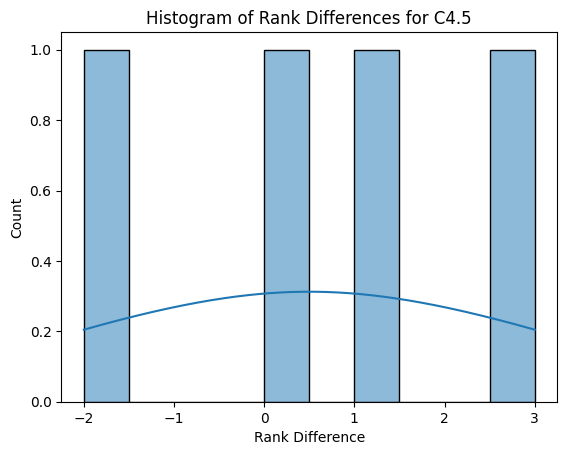

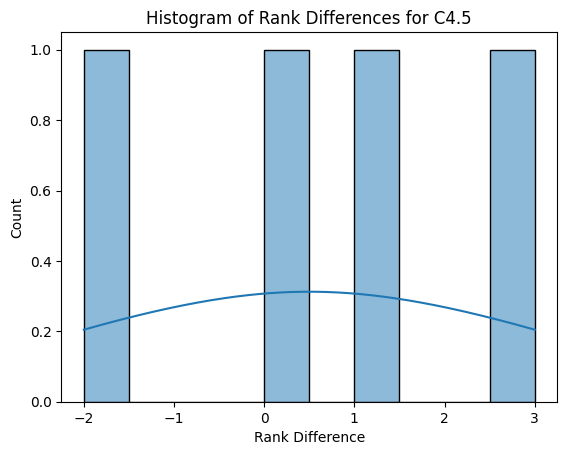

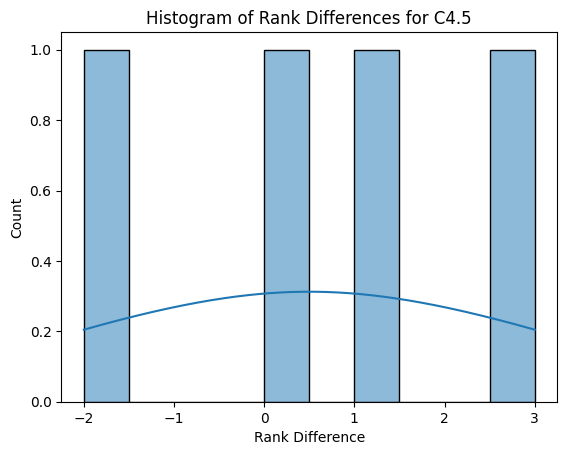

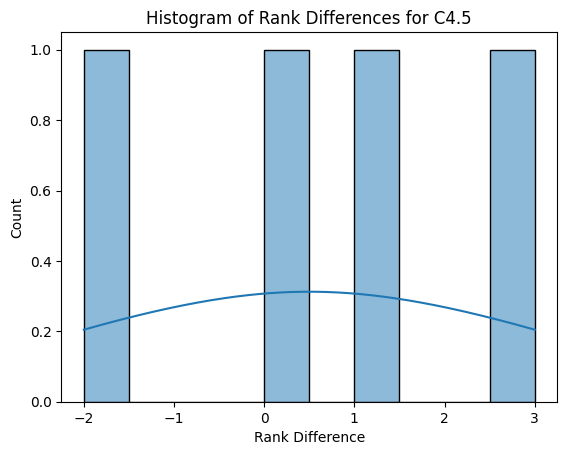

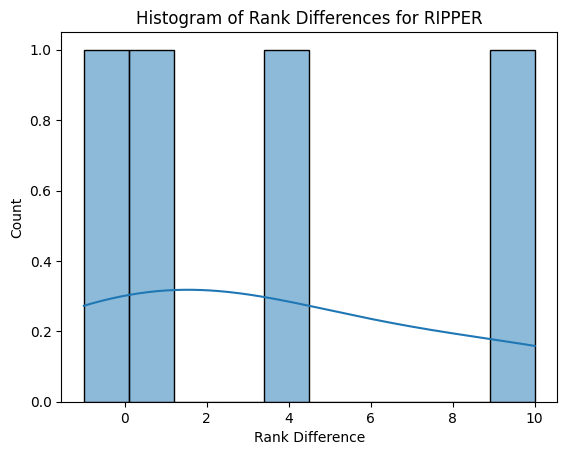

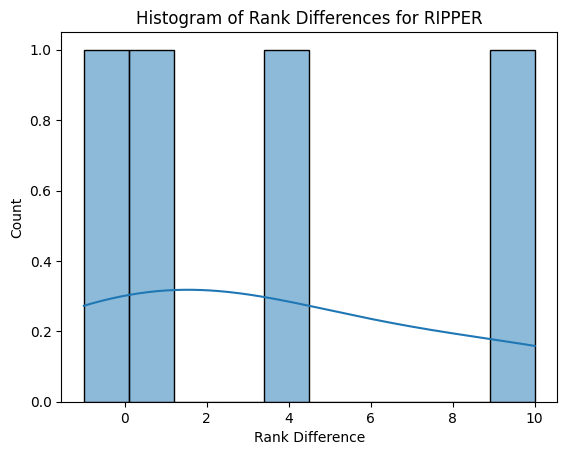

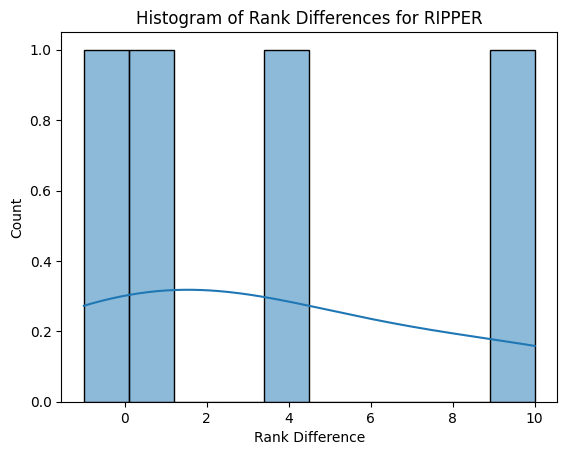

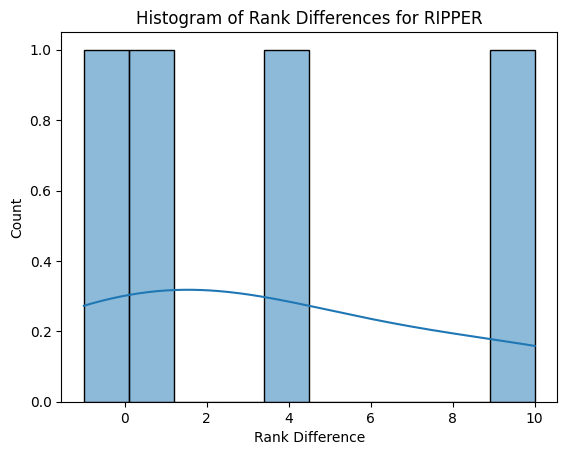

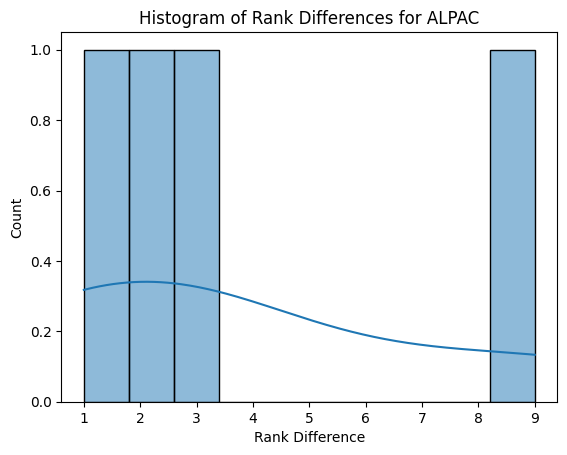

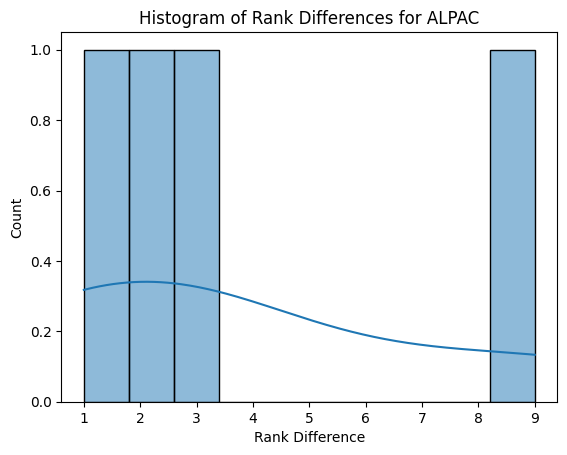

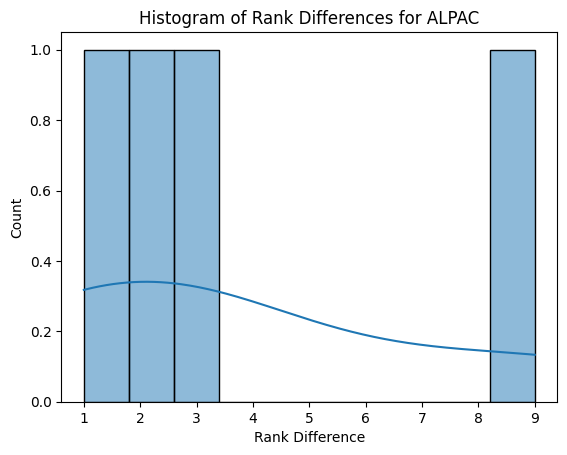

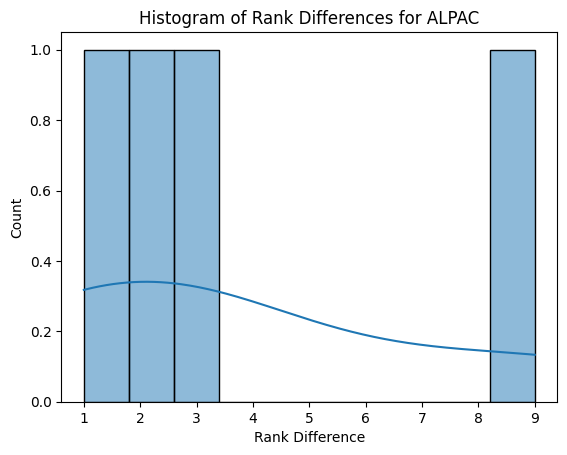

In [283]:
for model in vl["Model"]:
    plt.figure()
    sns.histplot(data=vl[vl["Model"] == model], x="TopFeatureRankDifference", bins=10, kde=True)
    plt.title(f"Histogram of Rank Differences for {model}")
    plt.xlabel("Rank Difference")
    plt.ylabel("Count")
    plt.show()


In [284]:
# Plot boxplots for each model and resampling technique
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Model", y="TopFeatureRankDifference", hue="Resampling")
plt.title("Discrepancy of Resampling Techniques on Different Classification Models")
plt.ylabel("Rank Difference")
plt.xlabel("Model")
plt.legend(title="Resampling Technique")
plt.show()

ValueError: Could not interpret input 'Model'

<Figure size 1000x600 with 0 Axes>